Locations array dimension: (4096, 2)
Observations array dimension: torch.Size([200, 4096])


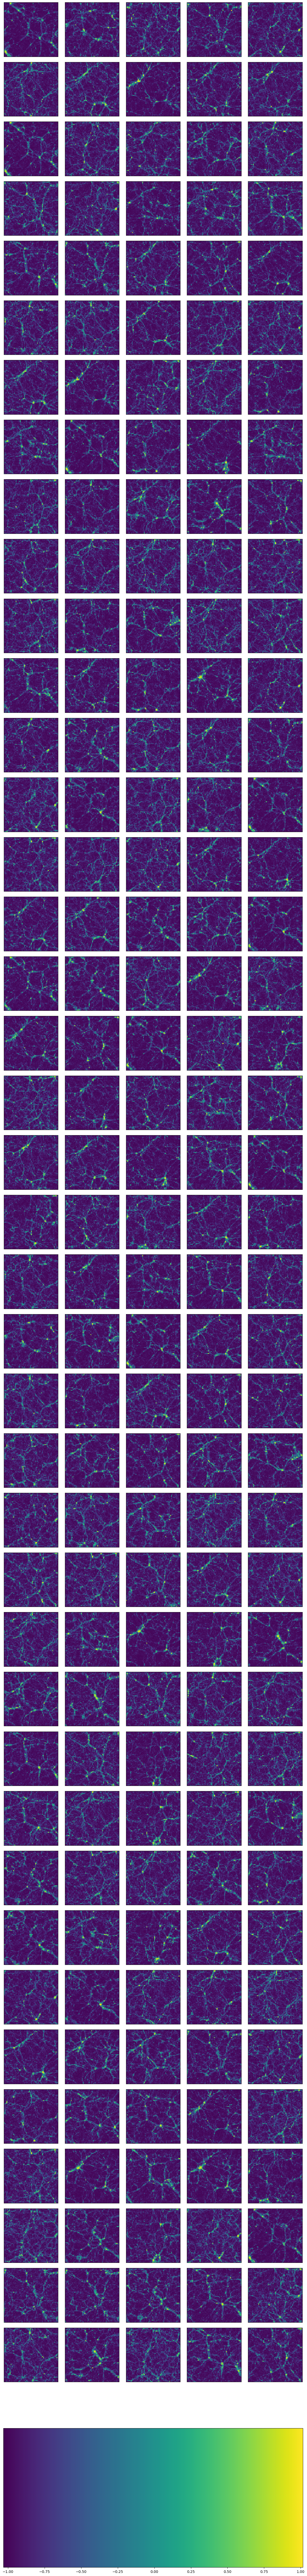

In [1]:
import pathlib
import pickle

import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd

import veccs.orderings
from batram.legmods import Data, SimpleTM

# %% [Load Data]
# Load locations and observations from CSV files.
locs = pd.read_csv("locs.csv", header=None).values  # Expect shape (4096, 2)
obs = torch.as_tensor(pd.read_csv("stacked.csv", header=None).to_numpy(), dtype=torch.float32)
obs = obs.T  # Now obs is (200, 4096): 200 images, each 4096 pixels

ord = np.lexsort((locs[:, 1], locs[:, 0]))
locs = locs[ord]
obs = obs[:, ord]


print(f"Locations array dimension: {locs.shape}")
print(f"Observations array dimension: {obs.shape}")

# %% [Visualize a few images]
gspec = {"wspace": 0.1, "hspace": 0.1}
fig, ax = plt.subplots(40, 5, figsize=(15, 6*20), gridspec_kw=gspec, squeeze=True)
vmin, vmax = obs.min(), obs.max()
for i in range(200):
    _ = ax[i // 5, i % 5]
    im = _.imshow(obs[i].reshape(64, 64), vmin=vmin, vmax=vmax)
    _.set_xticks([])
    _.set_yticks([])
fig.subplots_adjust(right=0.9)
cbar = fig.add_axes([0.125, 0.05, 0.775, 0.045])
fig.colorbar(im, cax=cbar, orientation="horizontal")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from batram.legmods import Data, SimpleTM

locs = pd.read_csv("locs.csv", header=None).values
obs = torch.as_tensor(pd.read_csv("stacked.csv", header=None).to_numpy(), dtype=torch.float32)
obs = obs.T

ord = np.lexsort((locs[:, 1], locs[:, 0]))
locs = locs[ord]
obs = obs[:, ord]

In [2]:
obs_mean = obs.mean(dim=0, keepdim=True)
obs_std = obs.std(dim=0, keepdim=True)
obs = (obs - obs_mean) / obs_std

train_obs = obs[:160, :]
test_obs  = obs[160:200, :]

order = veccs.orderings.maxmin_cpp(locs)
locs_ordered = locs[order, :]

train_obs_ordered = train_obs[:, order]
test_obs_ordered  = test_obs[:, order]

largest_conditioning_set = 100
nn = veccs.orderings.find_nns_l2(locs_ordered, largest_conditioning_set)

locs_tensor = torch.as_tensor(locs_ordered, dtype=torch.float32)

train_data = Data.new(locs_tensor, train_obs_ordered, torch.as_tensor(nn))
test_data  = Data.new(locs_tensor, test_obs_ordered, torch.as_tensor(nn))

Training with n = 5 samples


Train Loss: 5759.155, Test Loss: 54950.996: 100%|██████████| 200/200 [01:23<00:00,  2.38it/s]


0 -4988.8662109375
1 -4942.69921875
2 -4872.7333984375
3 -5093.5244140625
4 -5021.5234375
5 -3083.713623046875
6 -4433.02734375
7 -5129.4560546875
8 -5000.7373046875
9 -5745.41552734375
10 -4893.01416015625
11 -5096.8427734375
12 -5189.48779296875
13 -3494.986572265625
14 -4096.328125
15 -4476.14599609375
16 -5082.6064453125
17 -4842.201171875
18 -4370.8291015625
19 -5361.0107421875
20 -5439.4833984375
21 -4170.98828125
22 -4679.5068359375
23 -4596.56396484375
24 -4564.7783203125
25 -5016.4169921875
26 -4892.9873046875
27 -4905.00390625
28 -4225.50146484375
29 -2502.93798828125
30 -3990.044677734375
31 -4453.75341796875
32 -5234.27294921875
33 -4758.10107421875
34 -5497.7763671875
35 -5207.373046875
36 -5011.6240234375
37 -5273.1044921875
38 -5148.974609375
39 -4669.33935546875
Average log score for n = 5: -4736.3420

Training with n = 10 samples


Train Loss: 12077.293, Test Loss: 53134.348: 100%|██████████| 200/200 [01:30<00:00,  2.22it/s]


0 -5192.78515625
1 -5225.31298828125
2 -5045.89111328125
3 -4940.31884765625
4 -5196.14990234375
5 -3492.70947265625
6 -4605.884765625
7 -4965.22705078125
8 -4920.4638671875
9 -5828.0625
10 -4882.3603515625
11 -5210.6337890625
12 -5398.55810546875
13 -3831.322265625
14 -4462.24169921875
15 -4569.4775390625
16 -5347.1220703125
17 -5022.3544921875
18 -3937.628173828125
19 -5505.64501953125
20 -5632.37841796875
21 -3966.0986328125
22 -4936.3955078125
23 -4563.53564453125
24 -4679.52197265625
25 -5338.24072265625
26 -5032.91943359375
27 -4996.26953125
28 -4600.58935546875
29 -2887.14599609375
30 -4315.75390625
31 -4762.52685546875
32 -5408.7392578125
33 -4919.56494140625
34 -5759.65087890625
35 -5352.6220703125
36 -5169.81982421875
37 -5562.74609375
38 -5396.7783203125
39 -4885.6611328125
Average log score for n = 10: -4893.6777

Training with n = 30 samples


Train Loss: 37694.458, Test Loss: 51104.734: 100%|██████████| 200/200 [02:33<00:00,  1.31it/s]


0 -5531.9931640625
1 -5169.400390625
2 -5285.10302734375
3 -4823.89697265625
4 -5385.43212890625
5 -3872.267578125
6 -4798.8330078125
7 -5205.04248046875
8 -4901.884765625
9 -6142.0185546875
10 -5130.70263671875
11 -5316.64013671875
12 -5571.0595703125
13 -3634.40771484375
14 -4766.1162109375
15 -4757.35693359375
16 -5583.67822265625
17 -5166.54833984375
18 -4319.3427734375
19 -5207.88623046875
20 -5803.484375
21 -4237.36962890625
22 -4624.97509765625
23 -4823.06591796875
24 -4765.66943359375
25 -5583.34326171875
26 -5369.07470703125
27 -5162.41845703125
28 -4751.46728515625
29 -3087.06005859375
30 -3662.73046875
31 -4175.9541015625
32 -5733.2197265625
33 -4720.2724609375
34 -5610.84765625
35 -4859.451171875
36 -5397.267578125
37 -5797.95458984375
38 -4574.74169921875
39 -4360.02880859375
Average log score for n = 30: -4941.7502

Training with n = 50 samples


Train Loss: 59857.981, Test Loss: 50924.680: 100%|██████████| 200/200 [03:14<00:00,  1.03it/s]


0 -5580.4013671875
1 -4702.20068359375
2 -5216.57763671875
3 -4910.453125
4 -5519.54052734375
5 -4044.99853515625
6 -4794.5224609375
7 -5168.0263671875
8 -4456.6142578125
9 -5461.05810546875
10 -5021.66552734375
11 -4698.6533203125
12 -5592.58203125
13 -3792.138671875
14 -4857.65234375
15 -3542.49853515625
16 -5587.787109375
17 -5221.35986328125
18 -4095.35888671875
19 -5162.13671875
20 -5097.4541015625
21 -4283.1748046875
22 -4745.6123046875
23 -4819.55029296875
24 -4617.31689453125
25 -5691.6630859375
26 -5067.1904296875
27 -5123.5986328125
28 -4974.7470703125
29 -2875.74169921875
30 -3798.649658203125
31 -4276.78955078125
32 -5551.51171875
33 -4809.384765625
34 -5125.82275390625
35 -3978.131103515625
36 -3941.021728515625
37 -5843.79052734375
38 -4596.26904296875
39 -4268.919921875
Average log score for n = 50: -4772.8142

Training with n = 100 samples


Train Loss: 100756.761, Test Loss: 52433.129: 100%|██████████| 200/200 [07:52<00:00,  2.36s/it]


0 -3920.81689453125
1 -4834.0595703125
2 -4989.6787109375
3 -4649.13427734375
4 -5052.7607421875
5 -3514.842041015625
6 -4134.2763671875
7 -5282.5986328125
8 -4140.94873046875
9 -5641.708984375
10 -4465.4921875
11 -4621.41796875
12 -5619.28662109375
13 -3433.845947265625
14 -4898.6962890625
15 -3399.10009765625
16 -5629.94677734375
17 -5363.18896484375
18 -3503.794921875
19 -4214.03515625
20 -4808.0625
21 -3794.8046875
22 -4107.26806640625
23 -3763.59912109375
24 -3618.870849609375
25 -5783.7705078125
26 -4858.7158203125
27 -4983.53515625
28 -4232.87353515625
29 -2424.16455078125
30 -3638.3740234375
31 -4317.56884765625
32 -5167.63525390625
33 -4739.61328125
34 -5174.732421875
35 -4093.713623046875
36 -3946.630859375
37 -5883.51025390625
38 -4664.68994140625
39 -4118.1142578125
Average log score for n = 100: -4485.7469

Training with n = 160 samples


Train Loss: 140971.595, Test Loss: 54278.473: 100%|██████████| 200/200 [17:17<00:00,  5.19s/it]


0 -3909.76123046875
1 -4781.9482421875
2 -4924.13623046875
3 -4651.01171875
4 -3845.9794921875
5 -3549.959716796875
6 -4187.10498046875
7 -5106.34521484375
8 -4217.10888671875
9 -4673.9111328125
10 -3608.859130859375
11 -4734.2685546875
12 -4386.57666015625
13 -3450.08203125
14 -4605.02978515625
15 -3301.388916015625
16 -5335.32373046875
17 -4778.77294921875
18 -3560.59033203125
19 -3754.921142578125
20 -4018.938720703125
21 -2929.239013671875
22 -4145.5224609375
23 -3571.1767578125
24 -3480.1796875
25 -5816.3310546875
26 -4751.98291015625
27 -3924.845947265625
28 -4221.76611328125
29 -2449.048095703125
30 -3636.908447265625
31 -4223.6337890625
32 -4995.951171875
33 -3703.183349609375
34 -5206.115234375
35 -3867.8623046875
36 -3954.5087890625
37 -5900.15771484375
38 -4591.06640625
39 -3400.59375
Average log score for n = 160: -4203.8023



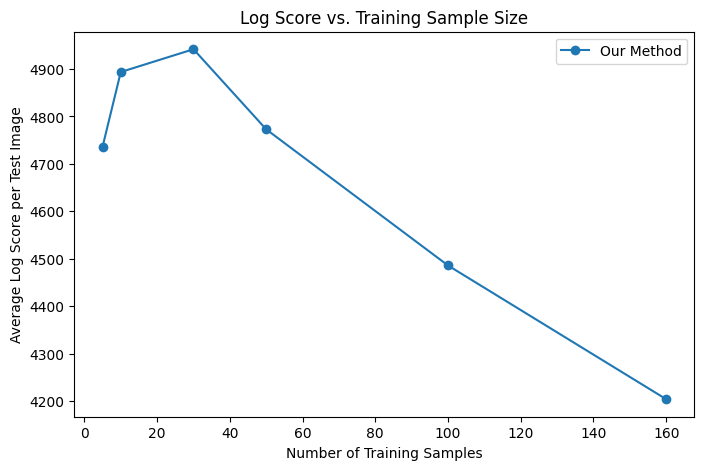

In [ ]:

avg_log_scores = []

for n in [5, 10, 30, 50, 100, 160]:
    print(f"Training with n = {n} samples")
    train_data_n = Data.new(locs_tensor, train_obs_ordered[:n, :], torch.as_tensor(nn))
    
    model = SimpleTM(train_data_n, theta_init=None, linear=False, smooth=0.5, nug_mult=4)
    
    nsteps = 200
    lr = 0.0001
    batch_size = 64
    
    opt = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=4)
    sched = torch.optim.lr_scheduler.CosineAnnealingLR(opt, nsteps, eta_min=0.0001)
    
    model.fit(nsteps, lr, test_data=test_data, optimizer=opt, scheduler=sched, batch_size=batch_size)
    
    test_scores = []
    num_test = test_data.response.shape[0]
    for i in range(num_test):
        test_image = test_data.response[i, :]
        score_i = model.score(test_image)
        print(i, score_i.item())
        test_scores.append(score_i.item())
    
    avg_score = np.mean(test_scores)
    avg_log_scores.append(-avg_score)
    print(f"Average log score for n = {n}: {avg_score:.4f}\n")

plt.figure(figsize=(8, 5))
plt.plot(sample_sizes, avg_log_scores, marker='o', label="Our Method")
plt.xlabel("Number of Training Samples")
plt.ylabel("Average Log Score per Test Image")
plt.title("Log Score vs. Training Sample Size")
plt.legend()
plt.show()


In [ ]:
tm = SimpleTM(train_data, theta_init=None, linear=False, smooth=1.5, nug_mult=4)

In [ ]:
params = list(tm.nugget.parameters())
print(params)


[Parameter containing:
tensor([0.1031, 0.2000], requires_grad=True)]


In [ ]:
nsteps = 100
opt = torch.optim.Adam(tm.parameters(), lr=0.0001, weight_decay=4)
sched = torch.optim.lr_scheduler.CosineAnnealingLR(opt, nsteps, eta_min=0.0001)
res = tm.fit(nsteps, 0.0001, test_data=test_data, optimizer=opt, scheduler=sched, batch_size=64)

Train Loss: 148558.636, Test Loss: 51064.285: 100%|██████████| 100/100 [08:42<00:00,  5.23s/it]


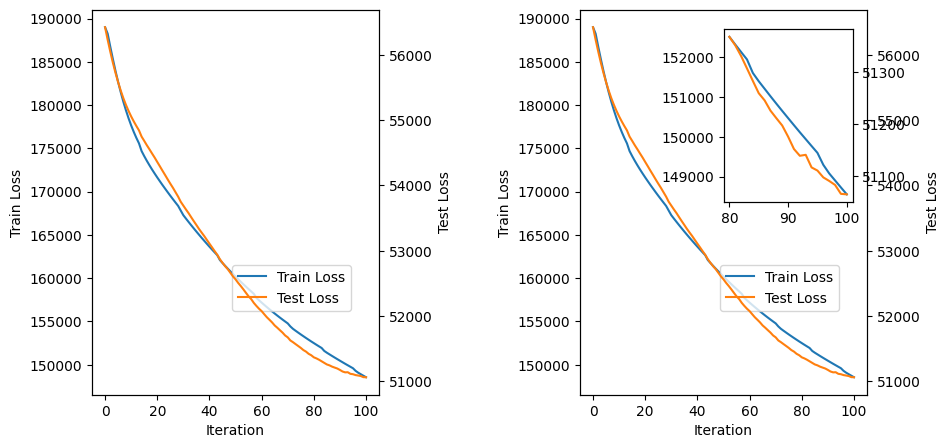

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={"wspace": 0.7})
res.plot_loss(axs[0], use_inset=False)
res.plot_loss(axs[1], use_inset=True)
plt.show()

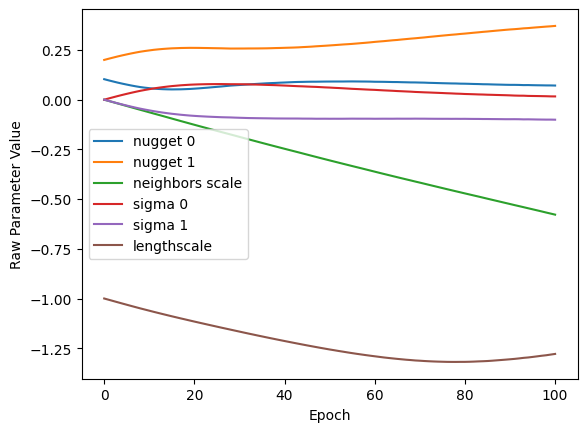

In [13]:
res.plot_params()
plt.show()

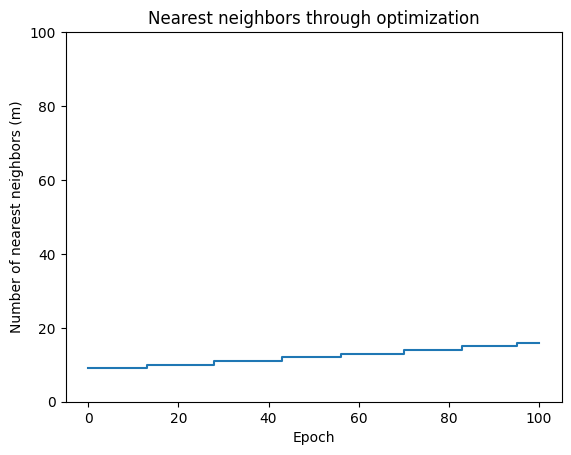

In [14]:
res.plot_neighbors()
plt.show()

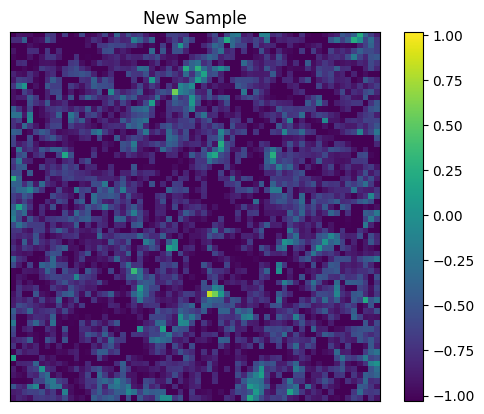

In [15]:
# Generate an unconditional new sample.
new_sample = tm.cond_sample()[0, ...]
# Reorder new_sample back to the original spatial order.
re_ordered_sample = torch.zeros_like(new_sample)
re_ordered_sample[..., order] = new_sample

# To convert back to the original scale, you might "undo" the normalization:
simulated = re_ordered_sample * obs_std + obs_mean

plt.imshow(simulated.reshape(64, 64), vmin=vmin, vmax=vmax, origin="upper")
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.title("New Sample")
plt.show()


In [16]:
i = 23  # e.g., the first test image in the test_data
test_field_ordered = test_data.response[i].clone()  # shape (4096,)

# PARTIAL OBSERVATION: fix the first 100 pixels
# Make sure these pixels are in the model's ordering
x_fix = test_field_ordered[:1000]

# Generate 2 conditional samples from the model
cond_samples = tm.cond_sample(x_fix=x_fix, num_samples=2)

# Reorder all fields back to the original (pre-maximin) order
# 1) The full test image
test_field_reordered = torch.zeros_like(test_field_ordered)
test_field_reordered[..., order] = test_field_ordered

# 2) The conditional samples
cond1 = cond_samples[0]
cond2 = cond_samples[1]

cond1_reordered = torch.zeros_like(cond1)
cond2_reordered = torch.zeros_like(cond2)
cond1_reordered[..., order] = cond1
cond2_reordered[..., order] = cond2


test_field_un = test_field_reordered * obs_std + obs_mean
cond1_un = cond1_reordered * obs_std + obs_mean
cond2_un = cond2_reordered * obs_std + obs_mean



C:\Users\camilo\AppData\Local\Temp\ipykernel_14892\3194525391.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


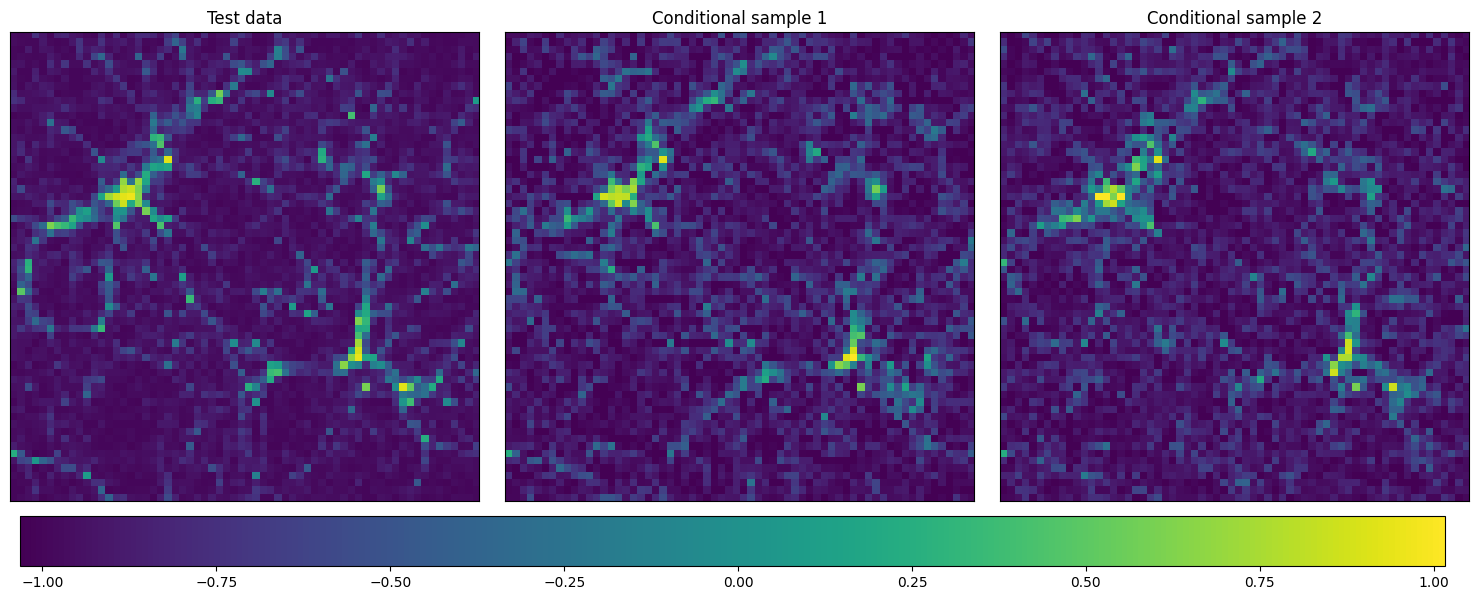

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original test image
im0 = axes[0].imshow(test_field_un.reshape(64, 64), vmin=vmin, vmax=vmax, origin="upper")
axes[0].set_title("Test data")
axes[0].set_xticks([])
axes[0].set_yticks([])

# Conditional sample 1
im1 = axes[1].imshow(cond1_un.reshape(64, 64), vmin=vmin, vmax=vmax, origin="upper")
axes[1].set_title("Conditional sample 1")
axes[1].set_xticks([])
axes[1].set_yticks([])

# Conditional sample 2
im2 = axes[2].imshow(cond2_un.reshape(64, 64), vmin=vmin, vmax=vmax, origin="upper")
axes[2].set_title("Conditional sample 2")
axes[2].set_xticks([])
axes[2].set_yticks([])

# Single colorbar for all  subplots
# left, bottom, width, height in figure coordinates
cbar_ax = fig.add_axes([0.02, -0.1, 0.95, 0.1])
fig.colorbar(im2, cax=cbar_ax, orientation="horizontal")
plt.tight_layout()
plt.show()
